# PROYECTO ANÁLISIS DE VENTAS - Abásolo Nicolás - Curso Data Science (Comisión 41870)
Google Drive: https://drive.google.com/drive/folders/1Pxijv3HiiD9bBRpyrRlTLE_JAdldAa3M?usp=sharing<br>
GitHub: https://github.com/nabasolo/ProyectoFinal_DataScience

<html><b><u>Introducción del Proyecto</u></b><br><br>
&nbsp;&nbsp;&nbsp;&nbsp;La toma de decisiones basada en datos es vital para las empresas que buscan obtener una ventaja competitiva sobre su competencia.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;Con el análisis de datos se busca realizar un seguimiento de las tendencias de ventas. Dicho conocimiento brinda ciertos beneficios claves para la toma de decisiones seguras basándonos en datos sólidos que brindan confianza. Las organizaciones pueden obtener información valiosa para producir proyecciones precisas de la demanda y de las ventas.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;Además, el uso de herramientas de análisis de ventas conduce a la creación de un desarrollo informado de servicios de producto y estrategias para impulsar el rendimiento de ventas de la empresa. Sumado a esto, los análisis posibilitan descubrir nuevas oportunidades para optimizar el proceso de ventas, reducir los costos operativos y supervisar las métricas de rendimiento.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;Finalizando, queremos enfatizar que el proceso de análisis de ventas consiste en recopilar y limpiar datos de diferentes fuentes, como sistemas de punto de venta y software de seguimiento de inventario, para detectar correlaciones en la información cuantitativa.<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;El conjunto de datos analizado 'ventasLab.xls' representa las ventas de medicamentos para uso humano de un laboratorio ecuatoriano durante 2021, 2022 y el primer semestre del 2023. En el mismo se detallan todos los movimientos de facturación incluyendo clientes, regiones, unidades vendidas, descuentos realizados y monto final.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;La empresa distribuye medicamentos en Ecuador generando, mediante visita médica, las prescripciones necesarias para efectuar la venta al consumidor final en las farmacias o en las cadenas especializadas en la distribución de los medicamentos.
&nbsp;&nbsp;&nbsp;&nbsp;La investigación principalmente se basará en analizar cómo ha sido su evolución de ventas en estos periodos. Nos interesa identificar la venta de ciertos productos prioritarios que representan el 80% de la venta (pareto). Otro propósito del proyecto, además de analizar los principales productos, es visualizar el crecimiento o decrecimiento de venta en algunos clientes en particular.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;Nuestra hipótesis principal es que las ventas, en general, han ido en aumento, pero queremos identificar a qué costo. ¿Hay más devoluciones y/o descuentos dados? Las devoluciones son muy importantes porque al devolver unidades debemos realizar una nota de crédito correspondiente por el monto devuelto.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Otra pregunta importante es: ¿Cuáles son los productos en baja? Es prioritario conocerlos para tomar las acciones correspondientes para levantar y negociar sus ventas. Quizás están en baja porque otros productos nuestros lo están reemplazando o porque la competencia ha iniciado acciones en su contra.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;Existen varios <b>desafíos</b> que podemos analizar según el conjunto de datos. Un desafío principal sería <b>predecir la venta</b> (en unidades) de cada producto para no dar falta del mismo a ningún cliente. Otro reto sería <b>categorizar cada cliente</b> para conocer sus principales productos, sus consumos mensuales y <u>disminuir la cantidad de unidades devueltas</u>. Esto último es muy importante porque las cantidades devueltas generan pérdida en la venta y son unidades que se deben destruir por estar vencidas o con corto vencimiento.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;A continuación obtendremos varias visualizaciones sobre los principales productos, principales clientes y sobre la evolución general durante el periodo. Analizaremos sobre el comportamiento de cada producto en particular. Vamos a ver un producto en particular para tratar de entender su evolución y consumo en los periodos estudiados pero se puede generalizar a todos recorriendo un listado de los productos.<br><br>

<html><b><u>Audiencia</u></b><br><br>
&nbsp;&nbsp;&nbsp;&nbsp;El proyecto está dirigido a analistas, directivos y supervisores que monitorean los resultados de ventas del Laboratorio.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Los resultados son relevantes para una futura toma de decisiones, pago de premios y acciones a llevar a cabo en corto o mediano plazo.
</html>

#### Resumen Temática
En el siguiente proyecto nos proponemos a analizar la información de ventas de medicamentos para uso humano de un laboratorio en Ecuador, principalmente nos basamos en los siguientes tópicos:

* Analizar las ventas del primer semestre del 2023 con respecto a periodos anteriores

* Analizar el crecimiento por zonas, regiones y cadenas.

* Analizar los principales clientes.

* Conocer la venta histórica de cada producto para no dar falta de stock.

##### Preguntas principales
* ¿Cómo han evolucionado las ventas?
* ¿Cuáles son los principales clientes?
* ¿Cuáles son los principales productos / moléculas?

###### Preguntas secundarias
* ¿Qué region influye más en la venta?
* ¿Qué productos han aumentado y cuales han disminuido?
* ¿Cómo fueron las ventas mensuales / semestrales / anuales?
* ¿Hay devoluciones? ¿Cuáles son los principales motivos? 


In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
ohe = OneHotEncoder()
scaler = MinMaxScaler()
le = LabelEncoder()

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Estilo Seaborn
sns.set_style('whitegrid')

In [73]:
df = pd.read_excel('ventasLab.xls')

In [74]:
# Visualizamos la información del conjunto de datos inicial. Verificamos que no haya valores nulos ni duplicados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62638 entries, 0 to 62637
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ano               62638 non-null  int64         
 1   mes               62638 non-null  int64         
 2   Canti vendida     62638 non-null  int64         
 3   Canti Bonificada  62638 non-null  int64         
 4   Canti Facturada   62638 non-null  int64         
 5   Uni_Presentación  62638 non-null  float64       
 6   USD Facturados    62638 non-null  float64       
 7   Region            62638 non-null  object        
 8   Sector            62638 non-null  object        
 9   Provincia         62638 non-null  object        
 10  Pueblo            62638 non-null  object        
 11  Canal             62638 non-null  object        
 12  produc            62638 non-null  object        
 13  descrip_corta     62638 non-null  object        
 14  generico          6263

In [75]:
# Eliminamos datos Duplicados
if (df.duplicated().sum() != 0):
    df = df.drop_duplicates()
else:
    print("No hay datos duplicados.")

print(df.shape)

No hay datos duplicados.
(62638, 30)


In [76]:
missing_data = df.isnull()
# missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ano
False    62638
Name: ano, dtype: int64

mes
False    62638
Name: mes, dtype: int64

Canti vendida
False    62638
Name: Canti vendida, dtype: int64

Canti Bonificada
False    62638
Name: Canti Bonificada, dtype: int64

Canti Facturada
False    62638
Name: Canti Facturada, dtype: int64

Uni_Presentación
False    62638
Name: Uni_Presentación, dtype: int64

USD Facturados
False    62638
Name: USD Facturados, dtype: int64

Region
False    62638
Name: Region, dtype: int64

Sector
False    62638
Name: Sector, dtype: int64

Provincia
False    62638
Name: Provincia, dtype: int64

Pueblo
False    62638
Name: Pueblo, dtype: int64

Canal
False    62638
Name: Canal, dtype: int64

produc
False    62638
Name: produc, dtype: int64

descrip_corta
False    62638
Name: descrip_corta, dtype: int64

generico
False    62638
Name: generico, dtype: int64

razon_social
False    62638
Name: razon_social, dtype: int64

nombre
False    62638
Name: nombre, dtype: int64

cliente
False    62638
Name: cliente, dt

In [77]:
if (sum(missing_data.sum()) == 0):
    print("No hay datos nulos.")
else:
    print("Hay datos nulos.")

No hay datos nulos.


In [78]:
# Agregamos columna 'fecha'
df['fecha'] = pd.to_datetime(df['ano'].astype(str) + '-' + df['mes'].astype(str) + '-01')

In [79]:
# Cantidad de Clientes
print("Cantidad de Clientes: " + str(len(df['nombre'].unique())))

Cantidad de Clientes: 2298


In [80]:
# Cantidad de Productos
print("Cantidad de Productos: " + str(len(df['descrip_corta'].unique())))

Cantidad de Productos: 70


In [81]:
# Cantidad de Comprobantes
print("Cantidad de Comprobantes: " + str(len(df['compro_nume'].unique())))

Cantidad de Comprobantes: 31682


In [82]:
# Cantidad de Moléculas
print("Cantidad de Moléculas: " + str(len(df['generico'].unique())))

Cantidad de Moléculas: 38


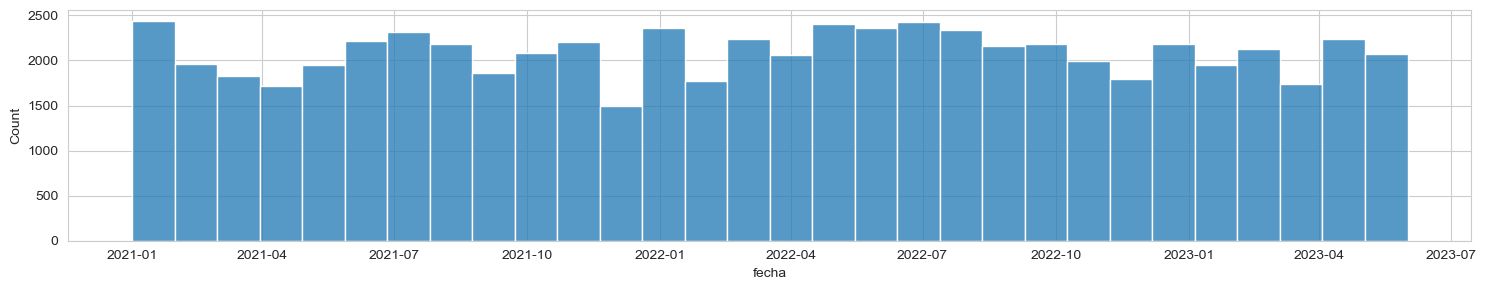

In [83]:
comprobantesDistribucion = df[['compro_nume', 'fecha']]

fig, ax = plt.subplots(figsize = (15, 3)) 
sns.histplot(data=comprobantesDistribucion, x='fecha', bins=30)
plt.xticks()

plt.tight_layout()
plt.savefig("comprobantesDistribucion.jpg")

plt.show()

## Respondiendo preguntas del cliente

Principales productos, principales clientes, evolución de la venta (unidades y valores), distribución de los comprobantes.

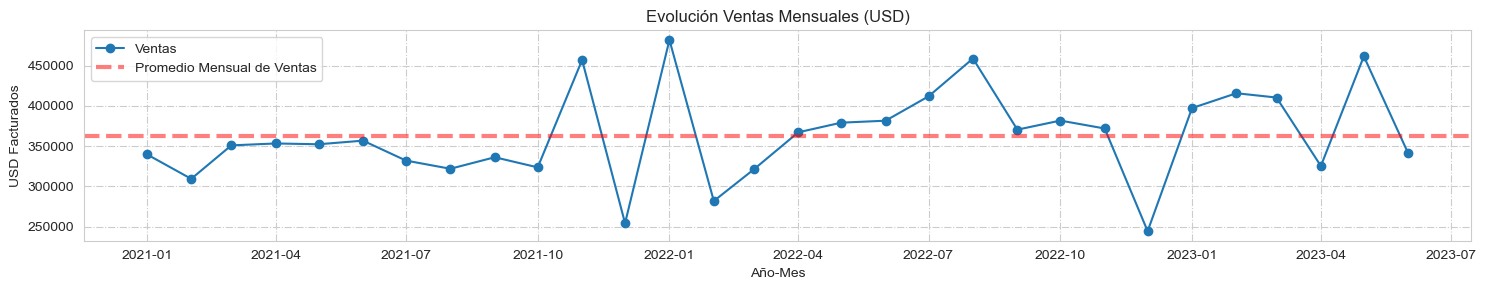

In [84]:
# Evolución de las ventas mensuales

# Datos
df_ventas_mensuales = df.groupby(['fecha'])['USD Facturados'].sum()
promedioVentas = df_ventas_mensuales.mean()

# Gráfico
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(df_ventas_mensuales.index, df_ventas_mensuales, label='Ventas', marker = "o")

plt.xlabel('Año-Mes')
plt.ylabel('USD Facturados')
ax.set_title("Evolución Ventas Mensuales (USD)")
ax.axhline(promedioVentas, color='red', linestyle='--', alpha=0.5, linewidth=3, label='Promedio Mensual de Ventas')
ax.grid(True, linestyle='-.')
ax.legend()

# Exportamos gráfico
plt.tight_layout()
plt.savefig("evolucionVentas_mensual.jpg")

# Mostramos gráfico
plt.show()

Se puede observar una venta errática con picos pronunciados en varios meses. Durante el 2022 la venta fue más pareja superando, en general, el promedio de ventas del periodo analizado. La baja de ventas de diciembre-22 se vió recuperada por el aumento en enero-23, febrero-23 y marzo-23.

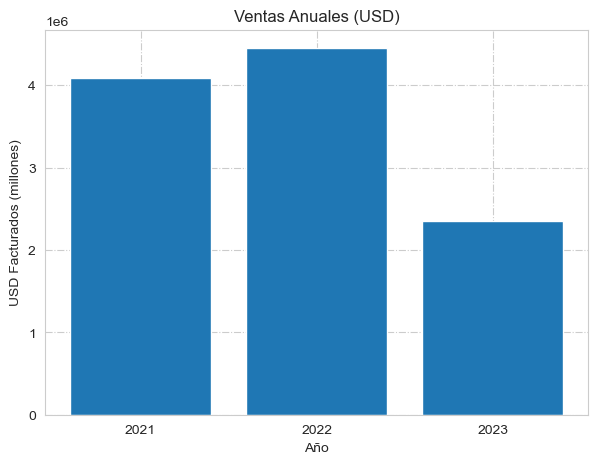

ano
2021    4086485.50
2022    4450986.14
2023    2350706.68
Name: USD Facturados, dtype: float64

In [85]:
# Ventas Anuales (USD)

# Datos
df_ventas_anuales = df.groupby(['ano'])['USD Facturados'].sum()

# Gráfico
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(df_ventas_anuales.index, df_ventas_anuales, label='Ventas', tick_label = df_ventas_anuales.index)

plt.xlabel('Año')
plt.ylabel('USD Facturados (millones)')
ax.set_title("Ventas Anuales (USD)")
ax.grid(True, linestyle='-.')

plt.show()
df_ventas_anuales

In [86]:
# Meses de venta
ano2021 = 12
ano2022 = 12
ano2023 = 6

In [87]:
ventasAnuales = np.array(df_ventas_anuales)
print("Venta mensual promedio 2021:", ventasAnuales[0]/ano2021)
print("Venta mensual promedio 2022:", ventasAnuales[1]/ano2022)
print("Venta mensual promedio 2023:", ventasAnuales[2]/ano2023)

Venta mensual promedio 2021: 340540.4583333333
Venta mensual promedio 2022: 370915.51166666666
Venta mensual promedio 2023: 391784.4466666667


In [88]:
print("Crecimiento de Ventas 2022 vs 2021:", round((((ventasAnuales[1]/ano2022)/(ventasAnuales[0]/ano2021)-1)*100),2), "%")
print("Crecimiento de Ventas 2023 vs 2022:", round((((ventasAnuales[2]/ano2023)/(ventasAnuales[1]/ano2022)-1)*100),2), "%")

Crecimiento de Ventas 2022 vs 2021: 8.92 %
Crecimiento de Ventas 2023 vs 2022: 5.63 %


Podemos descubrir que en el año 2022 hubo un aumento de ventas contra el año 2021. Del 2023 tenemos, hasta el momento, los seis primeros meses del año (1er semestre) notamos un crecimiento del 5,63% con respecto al año 2022.

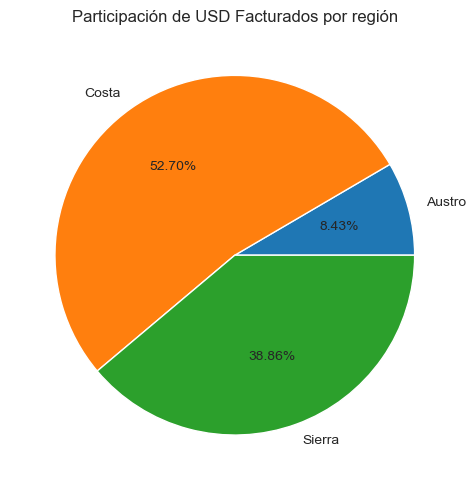

In [89]:
# Participación de USD Facturados por región

# Datos
df_region = df.groupby('Region')['USD Facturados'].sum()
regiones = df_region.index

# Gráfico
fig, ax = plt.subplots(figsize=(7, 5))

ax.pie(df_region, labels=df_region.index, autopct="%1.2f%%")

ax.set_title("Participación de USD Facturados por región")

plt.tight_layout()
plt.savefig("partRegion.jpg")

plt.show()

Podemos visualizar que de las tres regiones, dos sobresalen siendo aprox. el 92% de la venta. La región Costa se destaca obteniendo una participación de más del 50% de la facturación.

In [90]:
# Ventas por Regiones por Año
ventasRegionales = df[['Region', 'ano', 'USD Facturados']]

# Datos
df_region = ventasRegionales.groupby(['ano','Region'])['USD Facturados'].sum()
df_region

ano   Region
2021  Austro     271170.96
      Costa     2214847.69
      Sierra    1600466.85
2022  Austro     411733.69
      Costa     2212650.03
      Sierra    1826602.42
2023  Austro     235381.47
      Costa     1310947.38
      Sierra     804377.83
Name: USD Facturados, dtype: float64

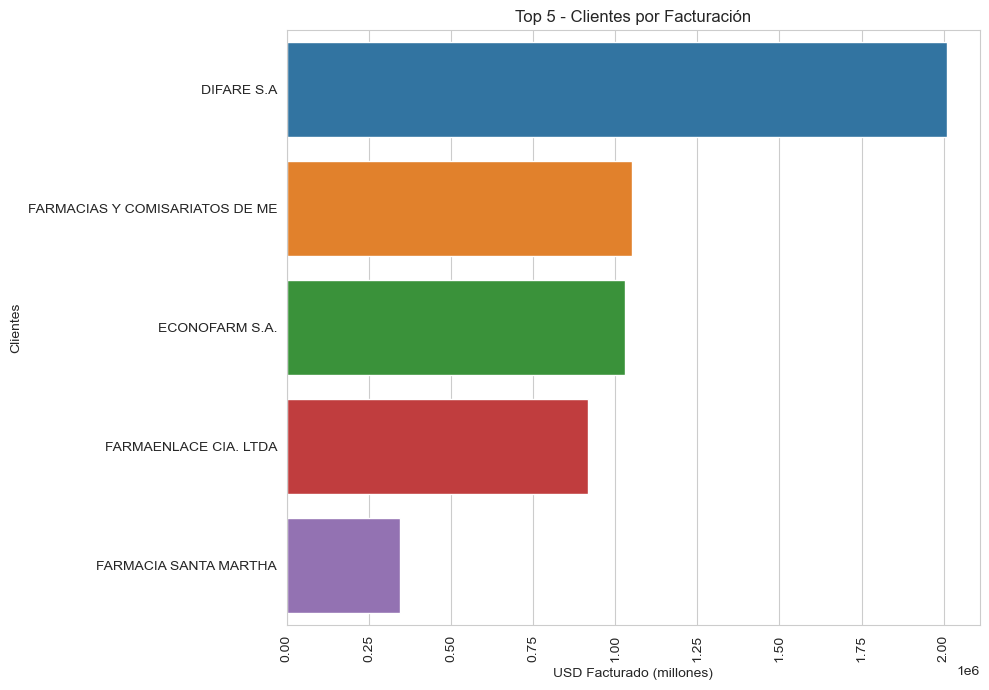

In [91]:
# Top 5 - Clientes según su facturación

# Datos
df_ventas_top5 = df.groupby(['nombre'])['USD Facturados'].sum().sort_values(ascending=False)[:5]

# Gráfico
fig, ax = plt.subplots(figsize=(10, 7))

plt.title("Top 5 - Clientes por Facturación")
plt.xticks(rotation = 90)
sns.barplot(y=df_ventas_top5.index, x=df_ventas_top5)
ax.set(ylabel='Clientes', xlabel='USD Facturado (millones)')

plt.tight_layout()
plt.savefig("topClientes.jpg")

plt.show()

Es importante conocer los principales clientes para poder brindarles un servicio acorde. En el gráfico anterior hemos resaltado los principales 5 clientes según su facturación. _$DIFARE$_ sobresale del resto. Podemos visualizar la diferencia entre el primer puesto y el quinto puesto indicando que la venta no se encuentra uniformemente distribuida.

In [92]:
# Clientes con factuación negativa (devuelven más de lo que compran)

df_ventas_negativas = df.groupby(['nombre'])['USD Facturados'].sum().sort_values(ascending=True).reset_index()
df_ventas_negativas = df_ventas_negativas[df_ventas_negativas['USD Facturados']<0]

df_ventas_negativas

,nombre,USD Facturados
0,FARMISARIATO MARIA AUXILIADORA,-3901.35
1,FARMACIA REINA DEL CISNE FARRE,-1518.72
2,SIMEDPHARMA S.A. SIMEDPHARMA S,-605.94
3,FARMACIA KARLENNY,-368.12
4,HEALTH ASSIST INTERNATIONAL (I,-316.36
...,...,...
177,ALBARRACIN NAVAS LORENA CARLOT,-3.17
178,FARMACIA GUADALUPANA 2,-3.08
179,FARMACIA LOJA 1,-2.07
180,FARMACIA FERNANDITO,-1.58


Llama la atención la cantidad de Clientes (182 clientes) que en los 30 meses analizados tienen facturación negativa. Es para revisar su plan de ventas.

In [93]:
# Cantidad de Comprobantes por Canal
canales = df['Canal'].unique()
print("Cantidad de Canales: " + str(len(canales)))

#print(df.groupby('Canal').size())

Cantidad de Canales: 16


In [94]:
# Facturación por Canal

df_ventas_Canal = df.groupby(['Canal'])['USD Facturados'].sum().sort_values(ascending=False).reset_index()
df_ventas_Canal

,Canal,USD Facturados
0,Cadenas,5008604.21
1,Farmacias,2486648.14
2,Farmacias PTL,1458511.68
3,Puntos de venta,469585.25
4,"Medico,clinica y hos",437526.63
5,Distribuidores,382481.09
6,Instituciones Priva.,255145.80
7,Ministerio de Salud,167315.87
8,Clientes Dialisis,102075.54
9,IESS,93905.62


In [95]:
# Facturación por Provincia

df_ventas_Provincia = df.groupby(['Provincia'])['USD Facturados'].sum().sort_values(ascending=False).reset_index()
df_ventas_Provincia

,Provincia,USD Facturados
0,Guayas,4131486.18
1,Pichincha,3814136.40
2,Manabí,845362.63
3,Azuay,507898.54
4,El Oro,419149.49
5,Los Ríos,322902.04
6,Loja,294891.82
7,San Domin de los Tsa,106673.75
8,Cañar,83977.28
9,Chimborazo,53996.47


In [96]:
# Cantidad de Productos
MotivosNC = df['Motivo_NC'].unique()

print("Cantidad de Motivos NC: " + str(len(MotivosNC)))
MotivosNC

# El motivo 'VENTA' no es devolución

Cantidad de Motivos NC: 21


array(['VENTA', 'Vencido autoriza lab.', 'Producto a Vencer',
       'Producto errado', 'Cierre cliente o farmacia', 'NO Solicitado',
       'Siembra', 'Faltante de producto por entregar', 'Falla de Fabric.',
       'Llega en mal estado', 'Error presentación', 'Autoriza Lab.',
       'Fact. Duplicada', 'Por Diferencia de Precio', 'Fact. Corto Vto',
       'LEGALIZACION FACT INST', 'Por Cambio de Fecha Factura',
       'Error de VM', 'Fact. error cantidad', 'Por Robo de Mercaderia',
       'DEVOLUCION FRACCIONES'], dtype=object)

In [97]:
df_MotivosNC = df.groupby(['Motivo_NC'])['USD Facturados'].sum().sort_values(ascending=True)[:10]
df_MotivosNC

Motivo_NC
Producto a Vencer             -597675.61
LEGALIZACION FACT INST        -253425.43
NO Solicitado                 -135220.41
Por Cambio de Fecha Factura    -59345.21
Autoriza Lab.                  -21468.87
Vencido autoriza lab.          -15054.14
Siembra                        -14532.84
Fact. Duplicada                -13772.89
Producto errado                 -5024.25
Por Diferencia de Precio        -3241.78
Name: USD Facturados, dtype: float64

Existen tres principales motivos de NC con un devolución mayor a los USD 60.000 en el periodo estudiado. Principalmente el motivo 'Producto a Vencer' que representa la devolución de mercadería con corto vencimiento que no puede ser nuevamente comercializada generando importantes pérdidas comerciales.

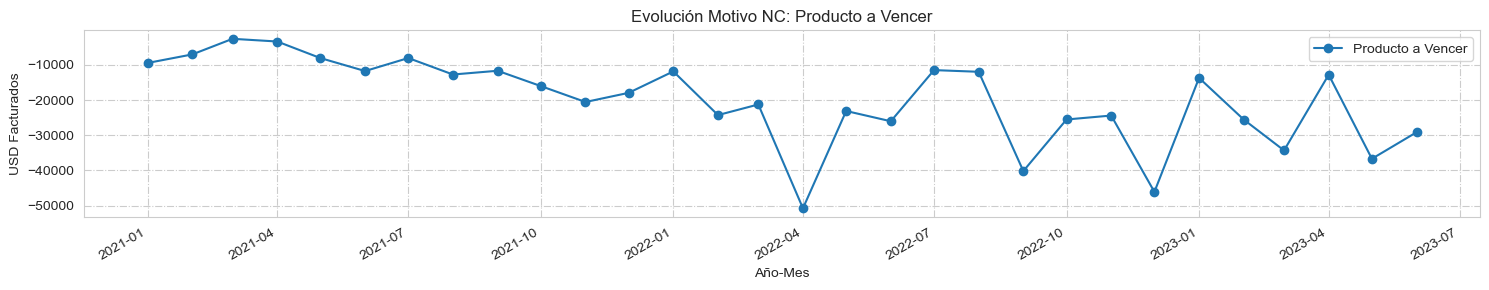

In [98]:
# Motivo NC Mensuales
motivoNC = 'Producto a Vencer'

# Datos
df_MotivoNC_mensuales = df.groupby(['fecha', 'Motivo_NC'])['USD Facturados'].sum().reset_index()
df_MotivoNC_mensuales = df_MotivoNC_mensuales[df_MotivoNC_mensuales['Motivo_NC'] == motivoNC]

# Gráfico
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot_date(df_MotivoNC_mensuales['fecha'], df_MotivoNC_mensuales['USD Facturados'], label=motivoNC, linestyle='solid')

plt.xlabel('Año-Mes')
plt.ylabel('USD Facturados')
ax.set_title("Evolución Motivo NC: "+ motivoNC)
ax.grid(True, linestyle='-.')
plt.gcf().autofmt_xdate() #Formato eje x
ax.legend()

plt.tight_layout()
plt.savefig("evolucionMotivoNC_mensual.png")

plt.show()
#df_ventas_mensuales

Durante el 2021 el motivo 'Producto a Vencer' se mantuvo bajo (cerca a 1000 USD mensuales). Se puede visualizar una devolución muy fuerte en abril/2022 y en diciembre/2022. Las devoluciones han estado aumentado y esto afecta la rentabilidad del laboratorio.

Preocupa el incremento en las notas de crédito por devolución de la mercadería.

In [99]:
# Vemos si hay relación entre el Motivo 'VENTA' y 'Producto a Vencer'

df_MotivoNC_mensuales_VENCER = df.groupby(['fecha', 'Motivo_NC'])['USD Facturados'].sum().reset_index()
df_MotivoNC_mensuales_VENCER = df_MotivoNC_mensuales_VENCER[df_MotivoNC_mensuales_VENCER['Motivo_NC'] == 'Producto a Vencer'].reset_index()

df_MotivoNC_mensuales_Venta = df.groupby(['fecha', 'Motivo_NC'])['USD Facturados'].sum().reset_index()
df_MotivoNC_mensuales_Venta = df_MotivoNC_mensuales_Venta[df_MotivoNC_mensuales_Venta['Motivo_NC'] == 'VENTA'].reset_index()

cmp_MotivosNC = pd.concat([df_MotivoNC_mensuales_Venta, df_MotivoNC_mensuales_VENCER], axis=1)

column_names = ['indice','fecha','motivo','facturado','indice2','fecha2','motivo2','facturado2']
cmp_MotivosNC.set_axis(column_names, axis=1, inplace=True)
#cmp_MotivosNC

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14712\3564181502.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  cmp_MotivosNC.set_axis(column_names, axis=1, inplace=True)


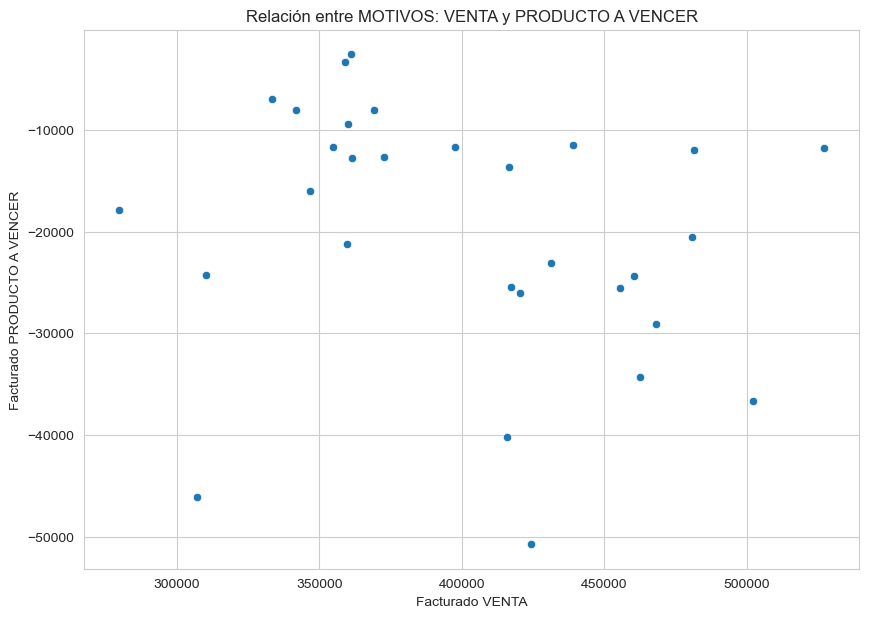

In [100]:
# Relación entre Cantidad Vendida y Facturación

# Gráfico
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=cmp_MotivosNC["facturado"], y=cmp_MotivosNC["facturado2"])

plt.xlabel("Facturado VENTA")
plt.ylabel("Facturado PRODUCTO A VENCER")
plt.title("Relación entre MOTIVOS: VENTA y PRODUCTO A VENCER")
plt.show()

In [101]:
np.corrcoef(cmp_MotivosNC['facturado'], cmp_MotivosNC['facturado2'])

array([[ 1.        , -0.23688661],
       [-0.23688661,  1.        ]])

No se nota una correlación entre estos dos motivos de las NC. Quizás cuando la Venta era mayor se puede tomar que la devolución lo sea. Lo más seguro que la Devolución este corrida porque pertenece a ventas de hace tiempo atrás.

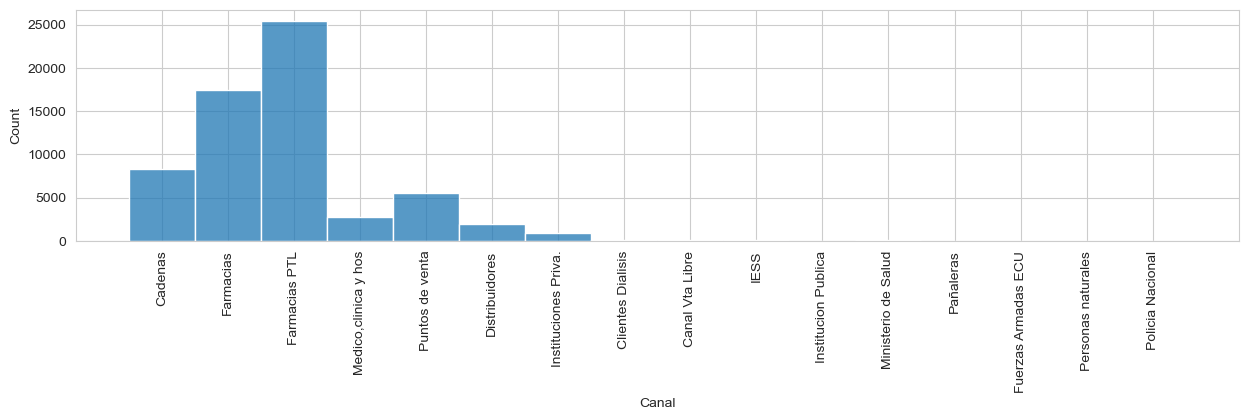

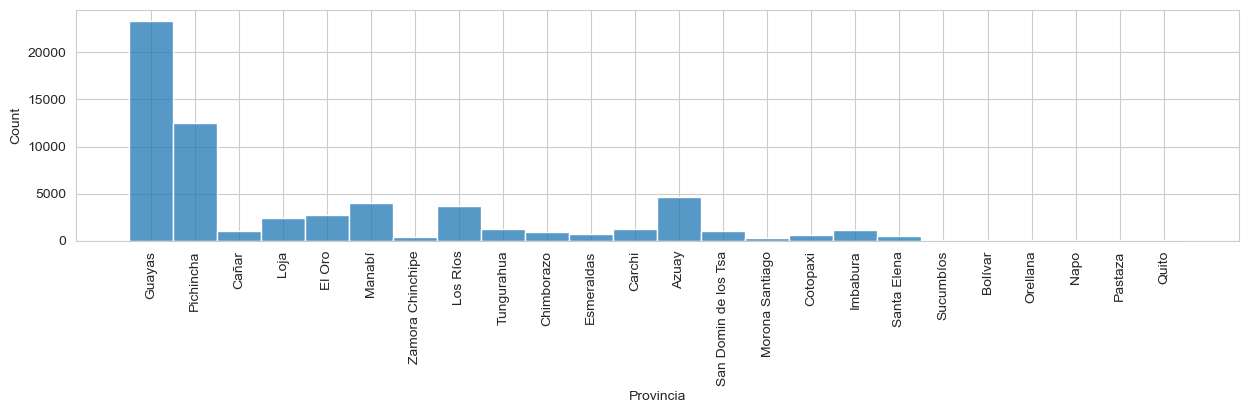

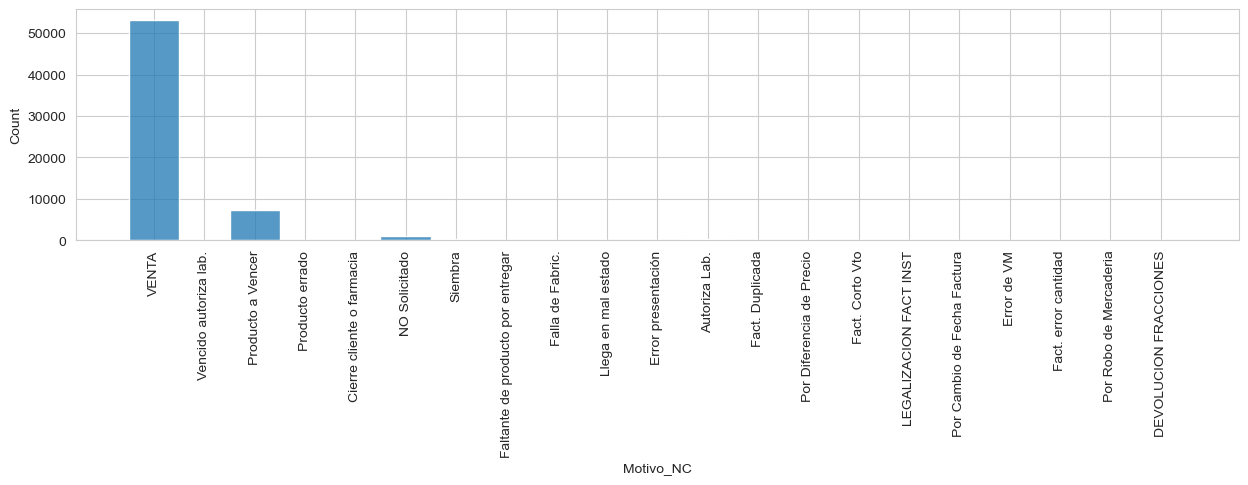

In [102]:
# Histogramas sobre la distribución de los comprobantes según Canal y Provincia

# Datos
columnas = ["Canal", "Provincia", "Motivo_NC"]

# Hacemos varios histogramas
for col in columnas:
    fig, ax = plt.subplots(figsize = (15, 3))        
    sns.histplot(data=df, x=col)
    plt.xticks(rotation = 90)
    plt.show()

En ambos gráficos contamos la cantidad de comprobantes que tenemos en la Base de Datos. Podemos visualizar que la mayoría de comprobantes son de la Provincia $Guayas$ y $Pichincha$. También tenemos segmentado por el Canal donde $Farmacias PTL$ y $Farmacias$ son donde má se generan los comprobantes. El canal $Cadenas$ también es un segmento importante de los comprobantes obtenidos.

Existe una cantidad notoria de $comprobantes$ con el motivo de $Productos$ $a$ $vencer$. Estos comprobantes son devoluciones con productos vencidos o con muy corto vencimiento. La mayoría de los $comprobantes$ corresponden a $Venta$.

Cada $comprobante$ es una fila dentro de nuestra Base de Datos indicando interación con nuestro Sistema de Ventas.

In [103]:
# Cantidad de Productos
productos = df['descrip_corta'].unique()
productos.sort()

genericos = df['generico'].unique()
genericos.sort()

print("Cantidad de Productos: " + str(len(productos)))
print("Cantidad de Genéricos: " + str(len(genericos)))

Cantidad de Productos: 70
Cantidad de Genéricos: 38


Se puede notar que hay varias presentaciones para un mismo medicamento genérico. Es decir, varias presentaciones de un medicamento con el mismo principio activo.

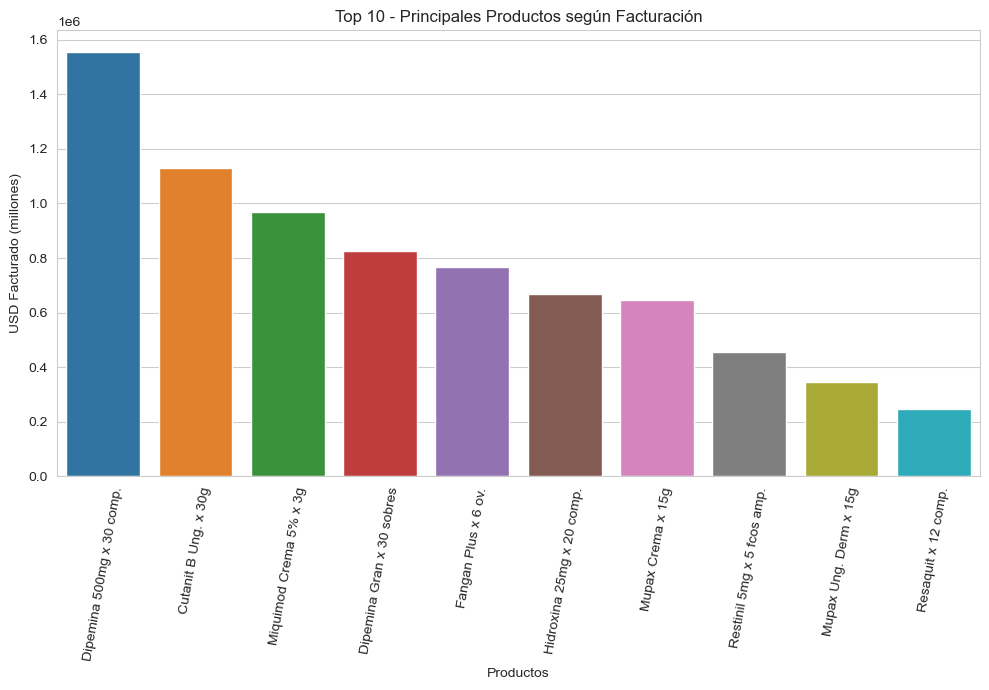

In [104]:
# Top 10 - Productos según su facturación

# Datos
df_ventas_top = df.groupby(['descrip_corta'])['USD Facturados'].sum().sort_values(ascending=False)[:10]

# Gráfico
fig, ax = plt.subplots(figsize=(10, 7))

plt.title("Top 10 - Principales Productos según Facturación")
plt.xticks(rotation = 80)
sns.barplot(x=df_ventas_top.index, y=df_ventas_top)
ax.set(xlabel='Productos', ylabel='USD Facturado (millones)')

plt.tight_layout()
plt.savefig("topProductos.jpg")

plt.show()

En el gráfico se pueden visualizar los primeros diez productos. Se destaca la _$Dipemina$_ _$comp.$_ en primer lugar. De estos productos no podemos dar falta y debemos estar pendientes a continuar con sus acciones promocionales.

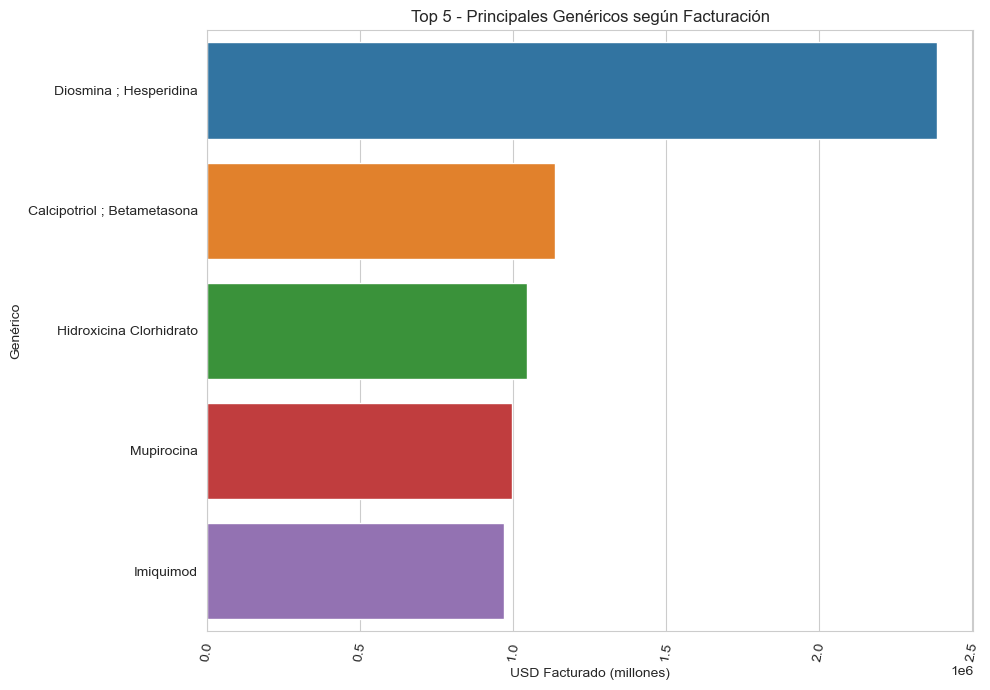

In [105]:
# Top 5 - Genéricos según su facturación

# Datos
df_ventas_top = df.groupby(['generico'])['USD Facturados'].sum().sort_values(ascending=False)[:5]

# Gráfico
fig, ax = plt.subplots(figsize=(10, 7))

plt.title("Top 5 - Principales Genéricos según Facturación")
plt.xticks(rotation = 80)
sns.barplot(y=df_ventas_top.index, x=df_ventas_top)
ax.set(ylabel='Genérico', xlabel='USD Facturado (millones)')

plt.tight_layout()
plt.savefig("topGenericos.jpg")

plt.show()

In [106]:
# Agrupar por año, mes y producto, y calcular el promedio de unidades
ventasUnid_mensualAnual = df.groupby(['ano', 'mes', 'descrip_corta'])['Uni_Presentación'].sum().reset_index()
ventasUnid_PromediomensualAnual = ventasUnid_mensualAnual.groupby(['ano', 'descrip_corta'])['Uni_Presentación'].mean().reset_index()

# Resultado
print(ventasUnid_PromediomensualAnual)

      ano                     descrip_corta  Uni_Presentación
0    2021       Alerfedine 180mg x 10 comp.        598.916667
1    2021           Alerfedine D x 10 comp.        198.916667
2    2021          Alerfedine Susp. x 100ml        148.800000
3    2021          Alerfedine Susp. x 150ml        -63.111111
4    2021           Astende 10mg x 28 comp.         -5.800000
..    ...                               ...               ...
169  2023      Talidomida 100mg x 100 comp.         24.500000
170  2023  Tempotane Gran 600mg x 10 sobres        619.500000
171  2023         Tempotane Susp 2% x 100ml        467.500000
172  2023       Terbilazar 250mg x 14 comp.        570.000000
173  2023            Terbilazar Crema x 15g       1535.333333

[174 rows x 3 columns]


In [107]:
# Venta Promedio Mensual de unidades de cada producto
anios = [2021,2022,2023]

for p in productos:
    for anio in anios:
        df_filtroProducto = ventasUnid_PromediomensualAnual[(ventasUnid_PromediomensualAnual['descrip_corta']==p) & (ventasUnid_PromediomensualAnual['ano']==anio)]['Uni_Presentación'].reset_index()
        
        try:
            cantidad = int(df_filtroProducto.loc[0]['Uni_Presentación'])
        except:
            # Si no se encuentra el producto en el año analizado
            pass
        else:
            print(str(anio) + " * " + p + ": " + str(cantidad) + " unidades mensuales")
            
        if (anio == anios[-1]):
            print("\n")
        

2021 * Alerfedine 180mg x 10 comp.: 598 unidades mensuales
2022 * Alerfedine 180mg x 10 comp.: 1075 unidades mensuales
2023 * Alerfedine 180mg x 10 comp.: 496 unidades mensuales


2021 * Alerfedine D x 10 comp.: 198 unidades mensuales
2022 * Alerfedine D x 10 comp.: 293 unidades mensuales
2023 * Alerfedine D x 10 comp.: 351 unidades mensuales


2021 * Alerfedine Susp. x 100ml: 148 unidades mensuales
2022 * Alerfedine Susp. x 100ml: 327 unidades mensuales
2023 * Alerfedine Susp. x 100ml: 752 unidades mensuales


2021 * Alerfedine Susp. x 150ml: -63 unidades mensuales
2022 * Alerfedine Susp. x 150ml: -28 unidades mensuales


2021 * Astende 10mg x 28 comp.: -5 unidades mensuales
2022 * Astende 10mg x 28 comp.: -9 unidades mensuales


2021 * Astende 20mg x 28 comp.: -11 unidades mensuales


2021 * Bactocilina 500mg x 7 comp.: 375 unidades mensuales
2022 * Bactocilina 500mg x 7 comp.: 525 unidades mensuales
2023 * Bactocilina 500mg x 7 comp.: 442 unidades mensuales


2021 * Bactocilina 750m

La tabla anterior ayuda a analizar el promedio de ventas en unidades de cada producto durante los últimos 30 meses. Existen productos con una venta promedio muy baja y hasta negativa. Seguramente se discontinuen a la brevedad o se planteen nuevas tácticas comerciales para aumentar su venta.

## Analizamos un producto en particular

In [108]:
#Producto elegido
producto = 'Dipemina 500mg x 30 comp.'

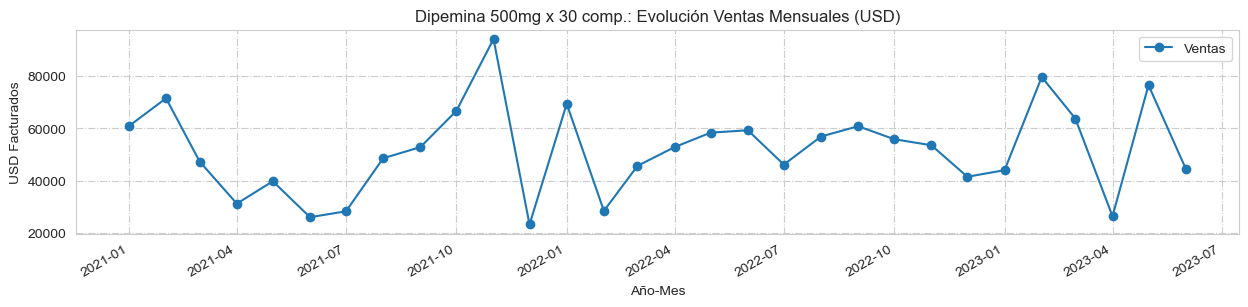

,fecha,USD Facturados
0,2021-01-01,60915.83
1,2021-02-01,71526.93
2,2021-03-01,47384.30
3,2021-04-01,31317.70
4,2021-05-01,39866.37
5,2021-06-01,26147.60
6,2021-07-01,28402.79
7,2021-08-01,48643.11
8,2021-09-01,52880.92
9,2021-10-01,66706.76


In [109]:
# Serie de Tiempo (plot_date) de las Ventas Mensuales de un producto en particular

# Datos
df_producto = df[df['descrip_corta'] == producto]
df_ventas_mensuales_producto = df_producto.groupby(['fecha'])['USD Facturados'].sum().reset_index()

# Gráfico
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot_date(df_ventas_mensuales_producto['fecha'], df_ventas_mensuales_producto['USD Facturados'], label='Ventas', linestyle='solid')

plt.xlabel('Año-Mes')
plt.ylabel('USD Facturados')
ax.set_title(producto + ": Evolución Ventas Mensuales (USD)")
ax.grid(True, linestyle='-.')
plt.gcf().autofmt_xdate() #Formato eje x
ax.legend()

plt.show()
df_ventas_mensuales_producto

Se puede observar una venta errática con picos pronunciados en varios meses. Durante el 2022 la venta se logró estabilizar. Podemos visualizar que cuando se produce un pico de ventas, al mes siguiente la venta baja bastante. Suele producirse por la colocación de unidades que no llegan a vender al usuario final resultando que al mes siguiente la cantidad de unidades vendidas sea menor.

In [110]:
# Ventas Mensuales
df_ventas_mensuales_producto.describe()

,USD Facturados
count,30.000000
mean,51866.176000
std,17244.793674
min,23363.000000
25%,42205.840000
50%,52897.995000
75%,60901.997500
max,94127.790000


Información de 30 meses - Producto Puntual:

Con un mínimo de venta de USD 23.363 y un máximo de USD 94.127.

El promedio de venta mensual es de USD 51.866.

,Region,ano,Uni_Presentación
0,Austro,2021,1682.0
1,Austro,2022,2146.0
2,Austro,2023,1313.0
3,Costa,2021,24238.0
4,Costa,2022,23691.0
5,Costa,2023,13844.0
6,Sierra,2021,22409.0
7,Sierra,2022,25858.0
8,Sierra,2023,12425.0


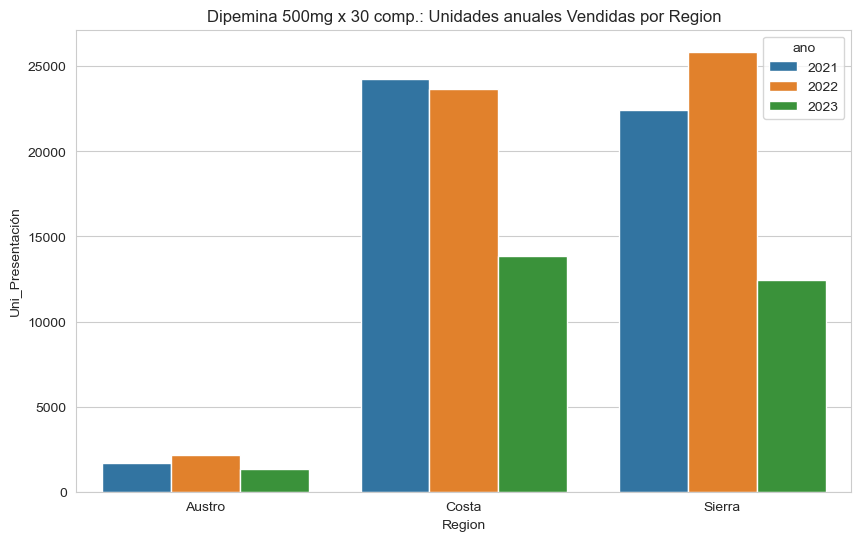

In [111]:
# Unidades anuales vendidas por Region (Gráfico de Barras)

df_RegionAno_producto = df_producto[['Uni_Presentación','Region','ano']].groupby(by=['Region','ano']).sum().reset_index()
plt.figure(figsize=(10,6))

plt.title(producto + ": Unidades anuales Vendidas por Region")

sns.barplot(y = 'Uni_Presentación', x = 'Region', hue='ano', data = df_RegionAno_producto);
df_RegionAno_producto

A partir del gráfico de barras, podemos notar un aumento de la venta en general. Podemos notar que durante el 2022 la cantidad ha aumentado menos en la region $Costa$ donde las unidades han disminuido en una mínima cantidad. Es imporante notar el aumento en la región $Sierra$ pasando a ser la región que más vende este producto. Durante el 2023 la región $Costa$ se ha recuparado vendiento más que $Sierra$. Otro factor es la gran defirencia del $Austro$ sobre las otras dos regiones.

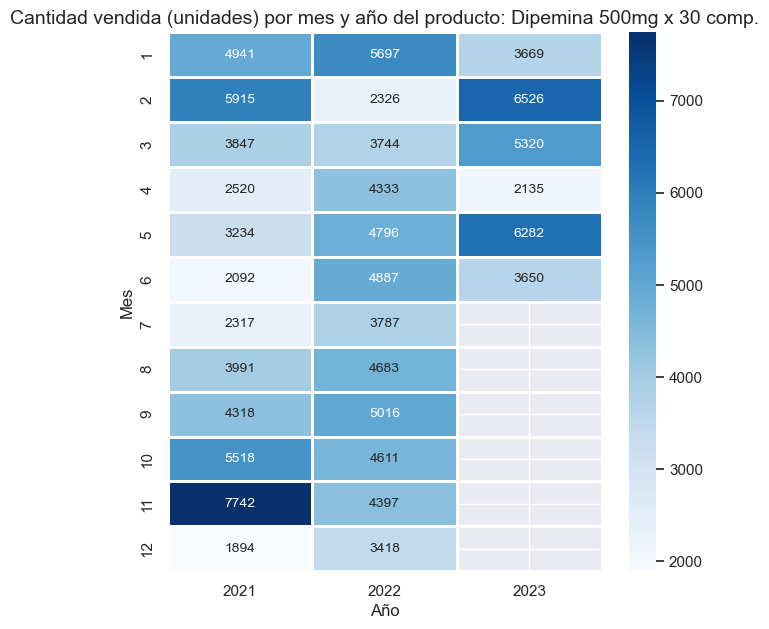

In [112]:
# Cantidad Vendida (unidades) por mes según un producto en particular

# Tabla pivote con las cantidades de unidades facturadas por mes y año
tabla_pivote = pd.pivot_table(df_producto, values="Uni_Presentación", index="mes", columns="ano", aggfunc=sum)

# Gráfico
sns.set()
plt.figure(figsize=(7,7))
sns.heatmap(tabla_pivote, annot=True, cmap = "Blues" , fmt=".0f", linewidths=1, annot_kws={"size": 10})
plt.title(f"Cantidad vendida (unidades) por mes y año del producto: {producto}", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Mes", fontsize=12)
plt.show()

En el gráfico _heatmap_ anterior, la intención es identificar si algún mes en particular hay un mayor requerimiento de un producto dado.

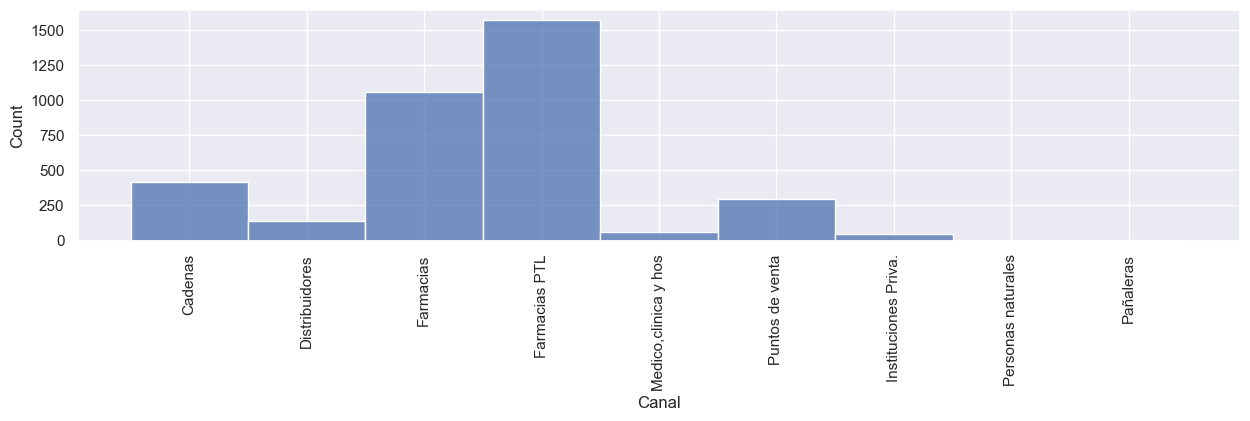

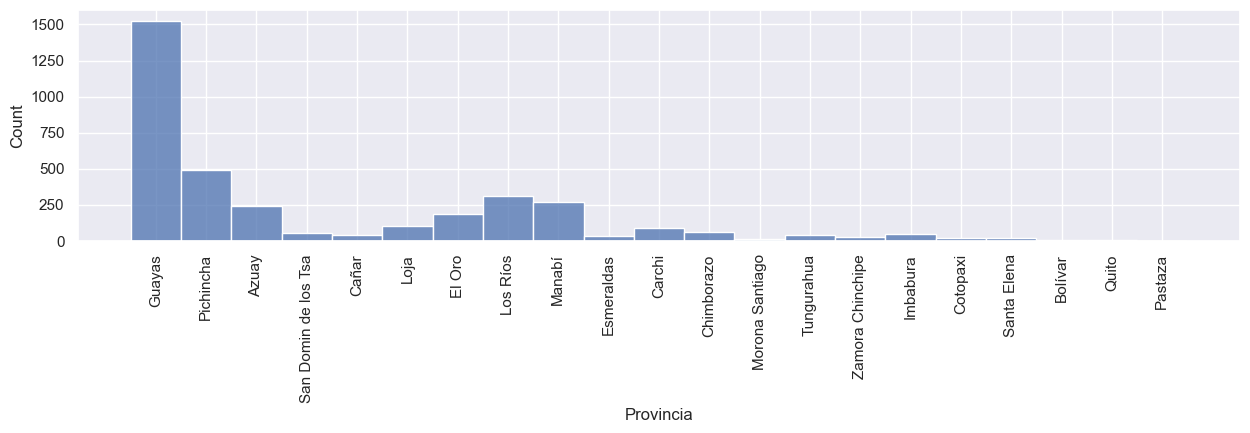

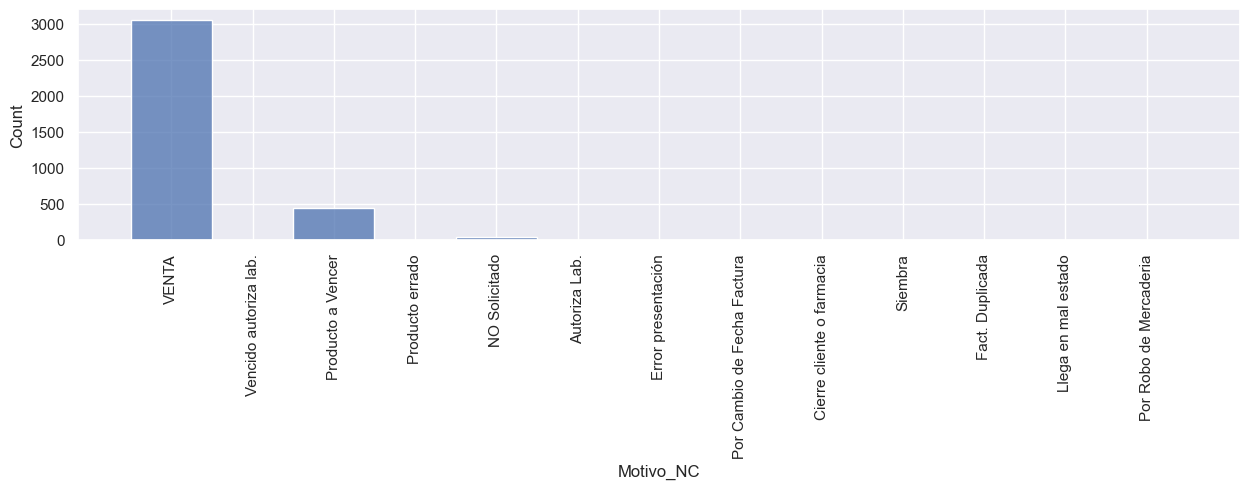

In [113]:
# Histogramas sobre la distribución de los comprobantes según Canal y Provincia

# Datos
columnas = ["Canal", "Provincia", "Motivo_NC"]

# Hacemos dos histogramas
for col in columnas:
    fig, ax = plt.subplots(figsize = (15, 3))        
    sns.histplot(data = df_producto, x = col, bins = 20)
    plt.xticks(rotation = 90)
    plt.show()

En ambos gráficos contamos la cantidad de comprobantes del producto escogido que tenemos en la Base de Datos. Podemos visualizar que la mayoría de comprobantes son de la Provincia $Guayas$ y $Pichincha$. También tenemos segmentado por el Canal donde $Farmacias PTL$ y $Farmacias$ son donde más se generan los comprobantes. El canal $Cadenas$ también es un segmento importante de los comprobantes obtenidos.

Existe una cantidad notoria de $comprobantes$ con el motivo de $Productos$ $a$ $vencer$. Estos comprobantes son devoluciones con productos vencidos o con muy corto vencimiento.

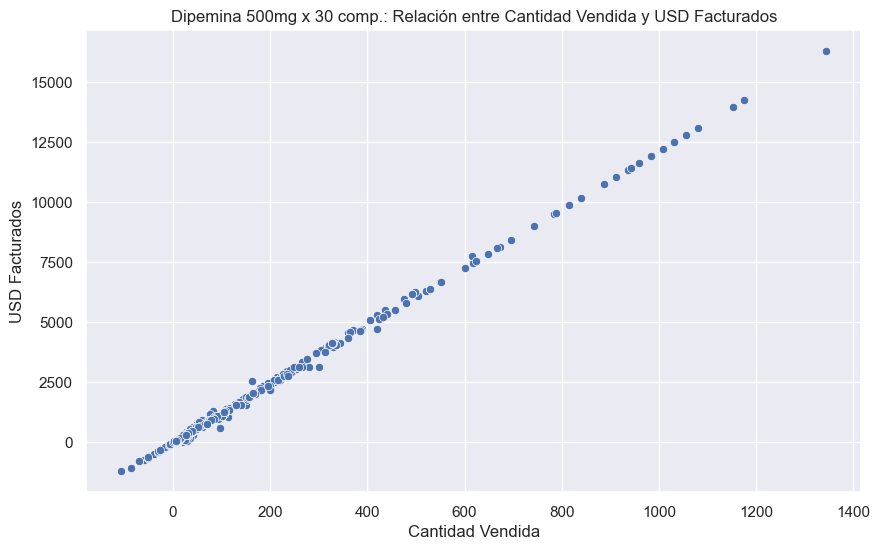

In [114]:
# Relación entre Cantidad Vendida y USD Facturados
plt.figure(figsize=(10,6))
plt.title(producto + ': Relación entre Cantidad Vendida y USD Facturados')
plt.xlabel('Cantidad Vendida')
plt.ylabel('USD Facturados')

sns.scatterplot(x = df_producto['Uni_Presentación'], y = df_producto['USD Facturados']);

In [115]:
# Matriz de Correlación de Pearson  
np.corrcoef(df_producto['Uni_Presentación'], df_producto['USD Facturados'])

array([[1.        , 0.99966703],
       [0.99966703, 1.        ]])

Parece existir una relación lineal entre ambas variables. Cuando calculamos la correlación de Pearson entre las dos variables nos da aprox. 0.999 lo cual es una relación positiva.
A partir de este resultado general no notamos ningún valor extraño como podría ser una cantidad de unidades vendidas a un bajo precio o viceversa. Esto es muy importante porque, si existiesen estos casos anormales habría que investigarlos porque se estarían dando descuentos excesivos o menos descuentos que los acordados con los clientes.
Como se puede apreciar si bien hay un par de puntos que no pertenecen a la recta estos se estudiarán de manera particular para conocer su caso. Sin embargo, no hay puntos que no sigan un patrón que nos signifique preocupación a simple vista.  

    ano  Uni_Presentación
0  2021       4027.416667
1  2022       4307.916667
2  2023       4597.000000


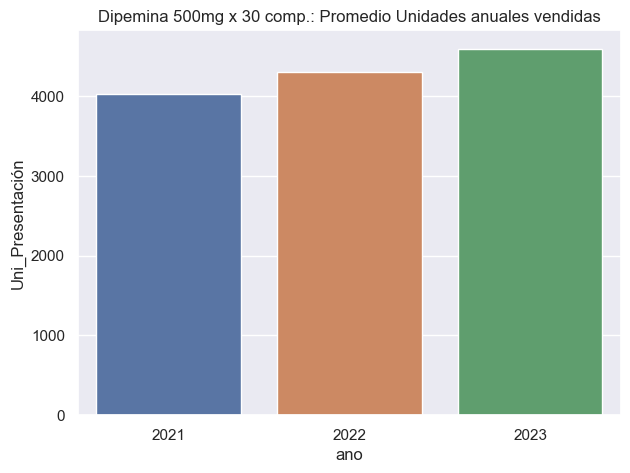

In [116]:
# Promedio de unidades vendidas por año
df_unidades_mensuales_producto = df_producto.groupby(['ano', 'mes'])['Uni_Presentación'].sum().reset_index()
df_unidades_promedioAnual_producto = df_unidades_mensuales_producto.groupby('ano')['Uni_Presentación'].mean().reset_index()

plt.figure(figsize=(7,5))
plt.title(producto + ": Promedio Unidades anuales vendidas")

sns.barplot(data = df_unidades_promedioAnual_producto, x = 'ano', y = 'Uni_Presentación');
print(df_unidades_promedioAnual_producto)

Se puede notar un aumento de las unidades vendidas durante los periodos analizados. Obtener el promedio es importante para estimar la cantidad de stock necesario contar cada mes en las bodegas para no dar falta y lograr cumplir los objetivos de ventas.

,nombre,ano,USD Facturados
0,DIFARE S.A,2021,117839.70
1,DIFARE S.A,2022,109267.27
2,DIFARE S.A,2023,67082.40
3,ECONOFARM S.A.,2021,118871.72
4,ECONOFARM S.A.,2022,136692.74
5,ECONOFARM S.A.,2023,64790.73
6,FARMACIAS SAN GREGORIO Nº 1,2021,15335.48
7,FARMACIAS SAN GREGORIO Nº 1,2022,20671.27
8,FARMACIAS SAN GREGORIO Nº 1,2023,12772.04
9,FARMACIAS Y COMISARIATOS DE ME,2021,91176.79


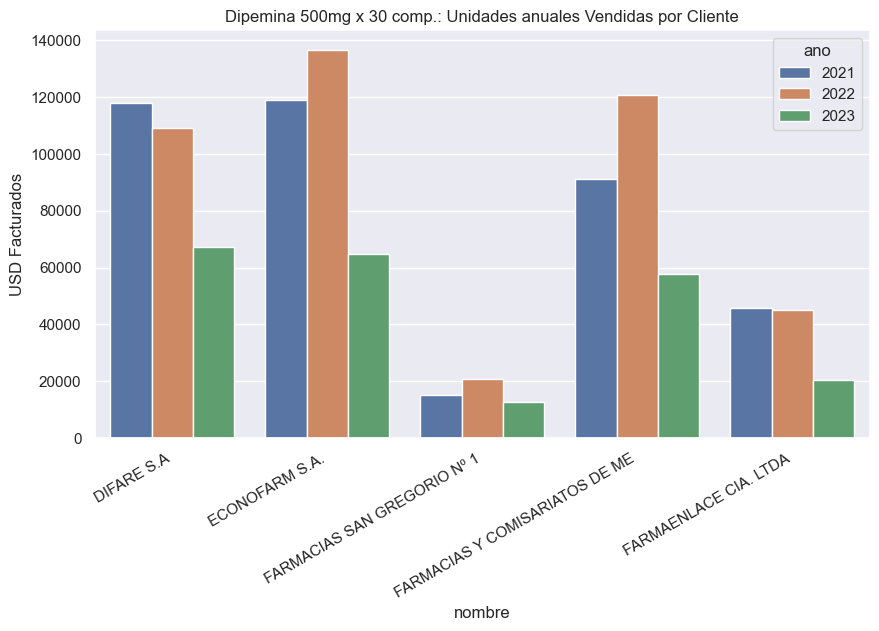

In [117]:
# Top 5 - Evolución de la facturación de los principales clientes

# Top 5 clientes del producto 
clientes_producto = df_producto.groupby('nombre')['USD Facturados'].sum().reset_index()
clientes_producto = clientes_producto.sort_values('USD Facturados', ascending=False).reset_index(drop=True)
clientes_producto_top5 = clientes_producto.head(5)

# Nos quedamos con la información de esos 5 clientes solamente
datos_producto_top5 = df_producto[df_producto['nombre'].isin(clientes_producto_top5['nombre'])]

clientes_producto_por_ano = datos_producto_top5.groupby(['nombre', 'ano'])['USD Facturados'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.title(producto + ": Unidades anuales Vendidas por Cliente")
plt.gcf().autofmt_xdate()

sns.barplot(x = 'nombre', y = 'USD Facturados', hue = 'ano', data = clientes_producto_por_ano);
clientes_producto_por_ano

Podemos visualizar que para los clientes $Difare$ y $Farmenlace$ se han bajado sus ventas durante el 2022. Caso contrario pasa con los demás clientes donde las ventas han aumentado. 

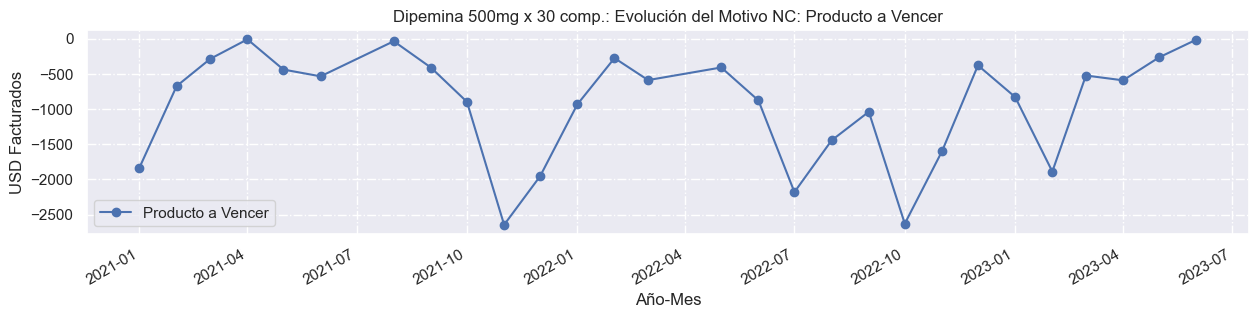

In [118]:
# Análisis devoluciones (plot_date): Producto a Vencer
motivoNC_producto = "Producto a Vencer"
df_producto_motivo = df_producto[df_producto['Motivo_NC'] == motivoNC_producto]

# Cliente que más devuelve y ventas devueltas
# Datos
df_motivoNC_mensuales_producto = df_producto_motivo.groupby(['fecha'])['USD Facturados'].sum().reset_index()

# Gráfico
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot_date(df_motivoNC_mensuales_producto['fecha'], df_motivoNC_mensuales_producto['USD Facturados'], 
             label=motivoNC_producto, linestyle='solid')

plt.xlabel('Año-Mes')
plt.ylabel('USD Facturados')
ax.set_title(producto + ": Evolución del Motivo NC: " + motivoNC_producto)
ax.grid(True, linestyle='-.')
plt.gcf().autofmt_xdate() #Formato eje x
ax.legend()

plt.show()

Notamos que durante el 2022 se han aumentado las devoluciones del producto. Durante el 2021 las devoluciones fueron más estables acercándose a cero. En el 2023 la tendencia del 2022 continúa teniéndo que devolver aprox. USD 2000 en febrero.

Finalizando este primer análisis podemos concluir que el producto analizado ha ido en aumento y deberían continuar sus acciones comerciales. Se encontraron algunos clientes que han disminuido su compra sobre los cuales se debería analizar los motivos. No se efectuaron descuentos particulares o acciones extrañas en las ventas. Habría que continuar el análisis sobre la venta mensual para calcular un estimado de unidades pero aprox. 4500 unidades mensuales se venden del producto de forma estable. Es para resaltar que la cantidad de devoluciones también han aumentado. Una pregunta sería si han aumentado en proporción más que las ventas, en tal caso es un caso importante a considerar porque significa que el aumento de ventas estaría siendo mal focalizado.

## Analizamos información del data set para seleccionar columnas de interés y relaciones entre los distintos datos

In [119]:
# Descripción de las columnas del Data Frame
df.columns

Index(['ano', 'mes', 'Canti vendida', 'Canti Bonificada', 'Canti Facturada',
       'Uni_Presentación', 'USD Facturados', 'Region', 'Sector', 'Provincia',
       'Pueblo', 'Canal', 'produc', 'descrip_corta', 'generico',
       'razon_social', 'nombre', 'cliente', 'compro_codi', 'compro_nume',
       'fecha_factura', 'Lote', 'Fecha_Vto', 'Motivo_NC', 'dscto_finan',
       '%dscto_finan', 'bonif_valor', '%dscto_bonif', 'dscto_total',
       '%dscto_total', 'fecha'],
      dtype='object')

In [120]:
# Columnas de interés:
col_interes = ['ano', 'mes', 'Canti Bonificada','Canti Facturada',
       'Uni_Presentación','USD Facturados','Region',
       'Provincia', 'Pueblo', 'Canal', 'descrip_corta',
       'generico', 'nombre', 'Motivo_NC',
       '%dscto_finan', '%dscto_bonif', '%dscto_total', 'fecha']

<html><b><u>Columnas de interés:</u></b>
    <ol>
        <li>'ano': Año de la venta</li>
        <li>'mes': Mes de la venta</li>
        <li>'Canti Bonificada': Unidades de obsequio (gratis)</li>
        <li>'Canti Facturada': Unidades de venta (que se recibe un pago)</li>
        <li>'Uni_Presentación': Total de Unidades de la venta (Venta + Obsequio)</li>
        <li>'USD Facturados': Total del monto de la venta. Valorización de la columna $'Canti$ $Facturada'$</li>
        <li>'Region': Región del cliente</li>
        <li>'Provincia': Provincia del cliente</li>
        <li>'Pueblo': Pueblo del cliente</li>
        <li>'Canal': Canal que pertenece el cliente</li>
        <li>'descrip_corta': Nombre del medicamento vendido</li>
        <li>'generico': Molécula asociada al medicamento</li>
        <li>'cliente': Código único de que representa a cada cliente</li>
        <li>'Motivo_NC': Motivo de la transacción: Motivo de la Nota de Crédito o si es una Factura de Venta</li>
        <li>'%dscto_finan': Monto del descuento financiero realizado en la transacción</li>
        <li>'%dscto_bonif': Monto del descuento por el obsequio realizado en la transacción</li>
        <li>'%dscto_total': Monto Total de los descuentos realizados en la transacción (Descuento Financiero + Descuento de Obsequio)</li>
        <li>'fecha': Primer día del mes de la venta</li>
    </ol>
</html>


In [121]:
# Eliminamos variables con intereses secundarios
df.drop(['Canti vendida', 'cliente', 'razon_social', 'compro_codi', 'compro_nume', 
         'Lote', 'Fecha_Vto', 'produc', 'Sector', 'fecha_factura', 'dscto_finan' , 
         'bonif_valor', 'dscto_total'], axis = 1, inplace=True)

In [122]:
df.describe()

,ano,mes,Canti Bonificada,Canti Facturada,Uni_Presentación,USD Facturados,%dscto_finan,%dscto_bonif,%dscto_total
count,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000
mean,2021.809205,5.837223,3.451052,21.841694,24.625166,173.827043,19.690577,28.550838,48.241415
std,0.739836,3.339553,11.946234,103.511747,102.478980,959.792381,162.687353,95.741047,186.288292
min,2021.000000,1.000000,-147.000000,-5600.000000,-5600.000000,-72800.000000,-5700.000000,-2940.000000,-5700.000000
25%,2021.000000,3.000000,0.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000
50%,2022.000000,6.000000,1.000000,5.000000,6.000000,45.960000,0.000000,4.350000,11.880000
75%,2022.000000,9.000000,3.000000,12.000000,16.000000,126.800000,0.000000,20.000000,37.500000
max,2023.000000,12.000000,600.000000,6000.000000,6000.000000,72800.000000,10921.200000,3635.730000,10921.200000


array([[<Axes: title={'center': 'ano'}>, <Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'Canti Bonificada'}>],
       [<Axes: title={'center': 'Canti Facturada'}>,
        <Axes: title={'center': 'Uni_Presentación'}>,
        <Axes: title={'center': 'USD Facturados'}>],
       [<Axes: title={'center': '%dscto_finan'}>,
        <Axes: title={'center': '%dscto_bonif'}>,
        <Axes: title={'center': '%dscto_total'}>],
       [<Axes: title={'center': 'fecha'}>, <Axes: >, <Axes: >]],
      dtype=object)

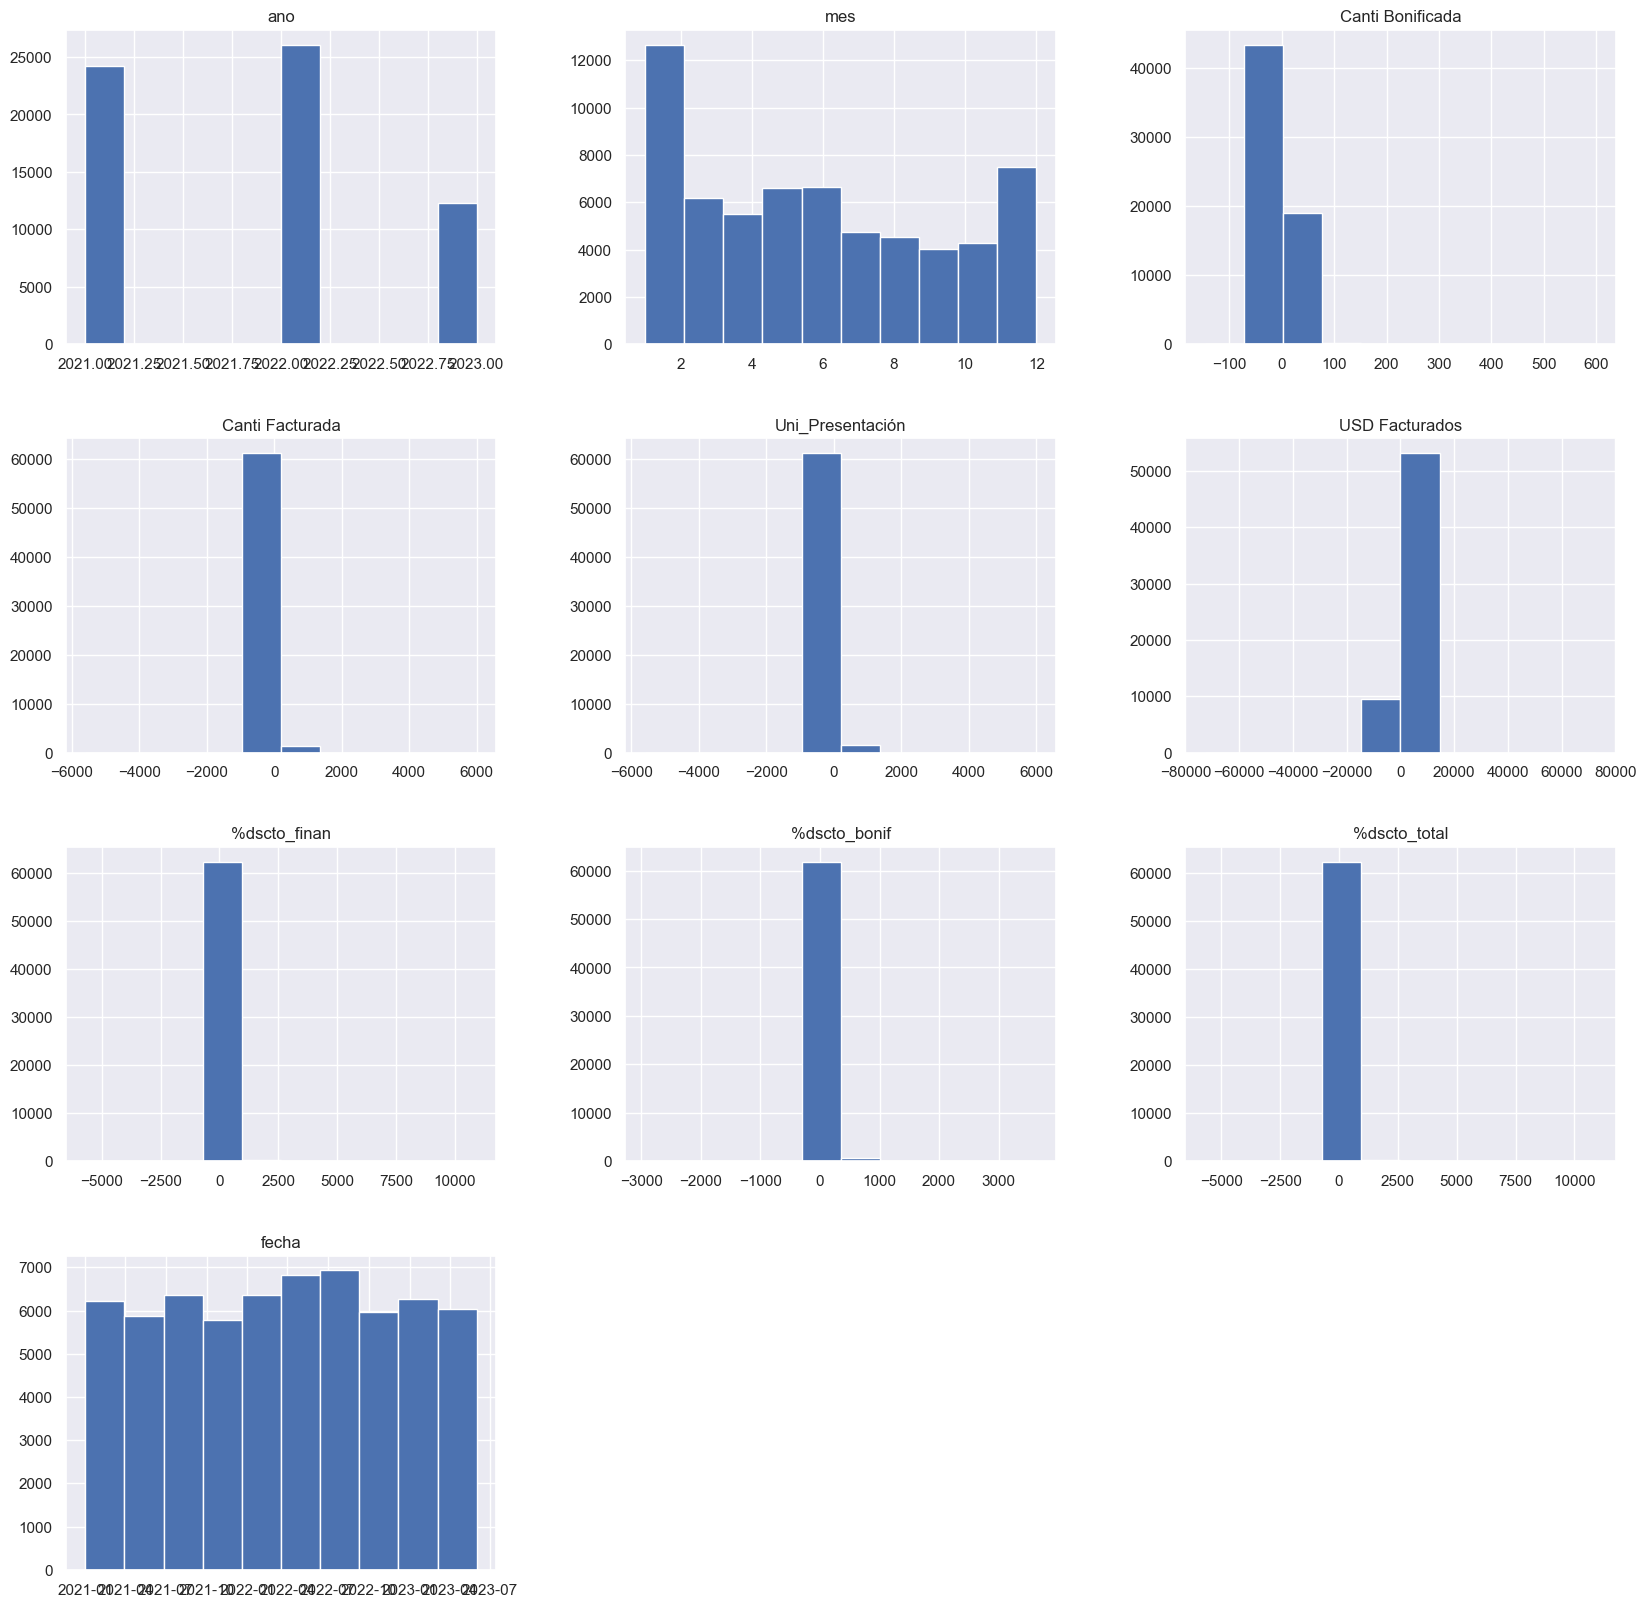

In [123]:
# Visualizamos rápidamente las columnas de interes y sus histogramas
df.hist(figsize=(20,20))

In [124]:
# Analizamos la correlatividad entre las columnas numéricas de interes
df.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14712\397522211.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ano,mes,Canti Bonificada,Canti Facturada,Uni_Presentación,USD Facturados,%dscto_finan,%dscto_bonif,%dscto_total
ano,1.000000,-0.274565,0.002701,0.017701,0.016453,0.007681,0.016844,0.013857,0.021832
mes,-0.274565,1.000000,-0.007042,-0.004536,-0.004403,-0.002486,0.004092,-0.009639,-0.001381
Canti Bonificada,0.002701,-0.007042,1.000000,0.315976,0.437615,0.189465,-0.031190,0.758625,0.362649
Canti Facturada,0.017701,-0.004536,0.315976,1.000000,0.941598,0.749288,0.382291,0.217552,0.445667
Uni_Presentación,0.016453,-0.004403,0.437615,0.941598,1.000000,0.772409,0.383296,0.310121,0.494120
USD Facturados,0.007681,-0.002486,0.189465,0.749288,0.772409,1.000000,0.550432,0.263286,0.616011
%dscto_finan,0.016844,0.004092,-0.031190,0.382291,0.383296,0.550432,1.000000,-0.029860,0.857963
%dscto_bonif,0.013857,-0.009639,0.758625,0.217552,0.310121,0.263286,-0.029860,1.000000,0.487863
%dscto_total,0.021832,-0.001381,0.362649,0.445667,0.494120,0.616011,0.857963,0.487863,1.000000


No se visualiza una correlación no intuitiva entre las variables de interes numéricas escogidas. Si bien 'Uni_Presentación' con 'Canti Facturada' se obtiene un 0.92 es entendible que así sea. Nos sorprende la baja correlación en 'USD Facturados' y 'Canti Facturada' (0.719) o entre 'USD Facturados' y 'Uni_Presentación' (0.747). Seguramente se deban a los distintos precios de cada producto y distintos obsequios otorgados. A priori hubiésemos supuesto que esa correlación iba a ser mayor cerca de un 98%.

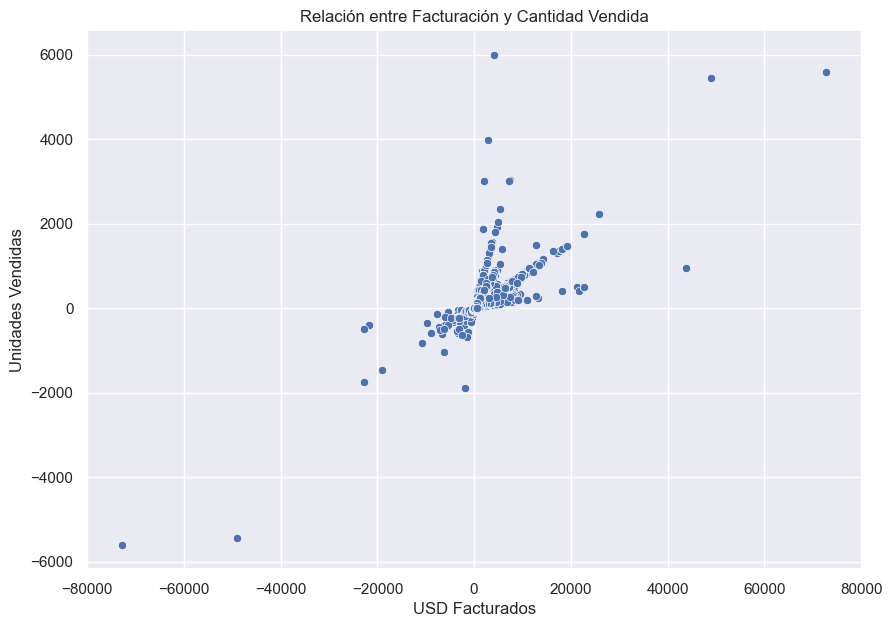

In [125]:
# Relación entre Cantidad Vendida y Facturación

# Gráfico
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=df["USD Facturados"], y=df["Uni_Presentación"])

plt.xlabel("USD Facturados")
plt.ylabel("Unidades Vendidas")
plt.title("Relación entre Facturación y Cantidad Vendida")
plt.show()

In [126]:
np.corrcoef(df['Uni_Presentación'], df['USD Facturados'])

array([[1.        , 0.77240934],
       [0.77240934, 1.        ]])

Por medio del gráfico podemos afirmar que mientras más unidades vendidas más es la facturación. Esto es lo que se esperaba en términos generales. Sin embargo, podemos encontrar valores aislados debido que piden menos unidades de productos con un precio mayor que el promedio o viceversa (muchas cantidades de productos más económicos).

***Algoritmo de Clasificación (Aprendizaje Supervisado)***

Se probará si podemos entrenar un modelo para predecir el motivo de una Nota de Crédito.

Separamos los datos en características (X) y variable objetivo (y).
Las variable objetivo es 'Motivo_NC'

In [127]:
# Transformación de variables categóricas (tipo object) a matriz para un posterior análisis
variables_cat = ['descrip_corta', 'fecha', 'generico', 'Motivo_NC', 'Region', 'Provincia', 'Pueblo', 'Canal', 'nombre']

for var_cat in variables_cat:
    df[var_cat] = le.fit_transform(df[var_cat])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62638 entries, 0 to 62637
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ano               62638 non-null  int64  
 1   mes               62638 non-null  int64  
 2   Canti Bonificada  62638 non-null  int64  
 3   Canti Facturada   62638 non-null  int64  
 4   Uni_Presentación  62638 non-null  float64
 5   USD Facturados    62638 non-null  float64
 6   Region            62638 non-null  int32  
 7   Provincia         62638 non-null  int32  
 8   Pueblo            62638 non-null  int32  
 9   Canal             62638 non-null  int32  
 10  descrip_corta     62638 non-null  int32  
 11  generico          62638 non-null  int32  
 12  nombre            62638 non-null  int32  
 13  Motivo_NC         62638 non-null  int32  
 14  %dscto_finan      62638 non-null  float64
 15  %dscto_bonif      62638 non-null  float64
 16  %dscto_total      62638 non-null  float6

In [128]:
variable_objetivo = 'Motivo_NC'
X = df.drop(variable_objetivo, axis=1)
y = df[variable_objetivo]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62638 entries, 0 to 62637
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ano               62638 non-null  int64  
 1   mes               62638 non-null  int64  
 2   Canti Bonificada  62638 non-null  int64  
 3   Canti Facturada   62638 non-null  int64  
 4   Uni_Presentación  62638 non-null  float64
 5   USD Facturados    62638 non-null  float64
 6   Region            62638 non-null  int32  
 7   Provincia         62638 non-null  int32  
 8   Pueblo            62638 non-null  int32  
 9   Canal             62638 non-null  int32  
 10  descrip_corta     62638 non-null  int32  
 11  generico          62638 non-null  int32  
 12  nombre            62638 non-null  int32  
 13  %dscto_finan      62638 non-null  float64
 14  %dscto_bonif      62638 non-null  float64
 15  %dscto_total      62638 non-null  float64
 16  fecha             62638 non-null  int64 

***Modelos de Machine Learning: KNN***

In [129]:
# Sequential Forward Selection(sfs)
sfs = SFS(KNeighborsClassifier(n_neighbors=4),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('mes',
 'USD Facturados',
 'Provincia',
 'Canal',
 'nombre',
 '%dscto_bonif',
 '%dscto_total',
 'fecha')

In [130]:
# Eliminamos variables que no aportarían interés en nuestro algoritmo de clasificación KNN según Forward Selection
X_KNN = X.drop(['ano', 'Canti Bonificada', 'Canti Facturada', 'Uni_Presentación', 'Region', 'Provincia', 'Pueblo', 
       'descrip_corta', 'generico', '%dscto_finan', '%dscto_total'], axis = 1)
#X_KNN.info()

In [131]:
X_KNN = scaler.fit_transform(X_KNN)
X_KNN = pd.DataFrame(X_KNN)
#X_KNN

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_KNN, y, test_size=0.3, random_state=42)

In [133]:
# Modelo de KNN

vecinos = range(1, 11)
max_precision = 0
vecino = 0

for i in vecinos:
    # Modelo de KNN
    knn = KNeighborsClassifier(n_neighbors=i)
    # Entrenamiento del modelo KNN
    knn.fit(X_train, y_train)
    # Realizar predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)
    # Evaluar la precisión del modelo
    accuracy = knn.score(X_test, y_test)
    print("Precisión del modelo con {:.0f} vecinos: {:.2f}%".format(i, accuracy * 100))
    if (max_precision < accuracy):
        max_precision = accuracy
        vecino = i
        y_pred_max = y_pred
        
print("Mejor precisión del modelo con {:.0f} vecinos: {:.2f}%".format(vecino, max_precision * 100))

Precisión del modelo con 1 vecinos: 91.00%
Precisión del modelo con 2 vecinos: 87.36%
Precisión del modelo con 3 vecinos: 89.29%
Precisión del modelo con 4 vecinos: 88.14%
Precisión del modelo con 5 vecinos: 88.89%
Precisión del modelo con 6 vecinos: 88.08%
Precisión del modelo con 7 vecinos: 88.66%
Precisión del modelo con 8 vecinos: 88.01%
Precisión del modelo con 9 vecinos: 88.16%
Precisión del modelo con 10 vecinos: 87.72%
Mejor precisión del modelo con 1 vecinos: 91.00%


In [134]:
# Calcular métricas de valorización del modelo
print(metrics.classification_report(y_test, y_pred_max))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        96
           1       0.59      0.77      0.67        30
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       1.00      1.00      1.00         1
           6       0.55      0.40      0.46        15
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.46      0.33      0.39        18
          11       0.17      0.17      0.17         6
          12       0.56      0.41      0.47       355
          13       0.96      0.74      0.84        31
          14       0.00      0.00      0.00         2
          15       0.73      0.80      0.76        10
          16       0.71      0.67      0.69      2165
          17       0.36      0.44      0.40         9
          18       0.34    

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


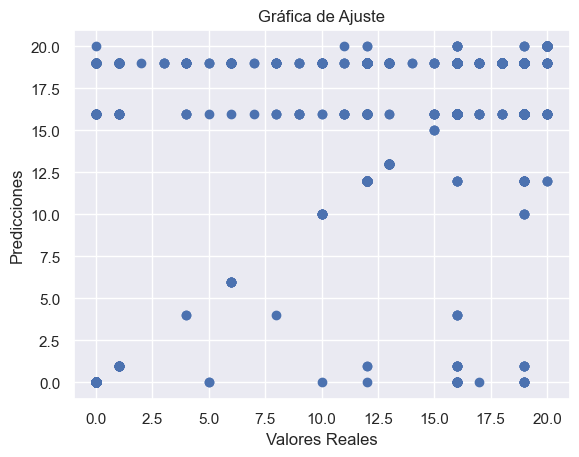

In [135]:
plt.scatter(y_train, knn.predict(X_train))
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.title('Gráfica de Ajuste', fontsize=12)
plt.show()

In [136]:
knn = KNeighborsClassifier(n_neighbors=1)
train_size_abs, train_scores, test_scores = learning_curve(knn, X_KNN, y, train_sizes=[0.1, 0.2, 0.3, 0.6, 0.9])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} muestras se usaron para entrenar el modelo")
    print(f"La precisión media del TRAIN es {cv_train_scores.mean():.2f}")
    print(f"La precisión media del TEST es {cv_test_scores.mean():.2f}")

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


5011 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.75
10022 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.75
15033 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.60
30066 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.49
45099 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.39


Bajo el algoritmo de clasificación $KNN$ hemos obtenido una exactitud (cerca que esta del resultado una medición del valor verdadero) del 91,5% con K = 1. Fue la mejor exactitud que pudimos obtener probando con hasta 10 vecinos.
Para el íncide nro. 19 se obtuvo una gran precisión de aciertos. Seguramente se debe a que es el item con mayor cantidad de filas en la base de datos y con el cual el algoritmo pudo entrenarse mejor.
Otro item importante es el número 16, para el cuál el algoritmo sólo obtuvo una precisión del 55%.

Existen varias variables con valor cero (0). Al tener pocos valores en la base de datos han entrado en el entrenamiento y no pudieron ser evaluados en los test.

Según lo que podemos visualizar en el gráfico anterior y con los datos obtenidos por $learning$_$curve$ podemos llegar a la conclusión que nuestro modelo $KNN$ tiene sub-ajuste ($underfitting$) que ocurre cuando un modelo no logra capturar los patrones subyacentes en los datos de entrenamiento y tiene un rendimiento deficiente tanto en los datos de entrenamiento como en nuevos datos. El modelo es demasiado simple o tiene una capacidad insuficiente para representar la relación entre las características y la variable objetivo.

***Modelos de Machine Learning: Decision Tree Classifier***

In [137]:
# Sequential Forward Selection(sfs)
sfs = SFS(DecisionTreeClassifier(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('ano',
 'mes',
 'Canti Bonificada',
 'Uni_Presentación',
 'USD Facturados',
 'Region',
 'nombre',
 'fecha')

In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62638 entries, 0 to 62637
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ano               62638 non-null  int64  
 1   mes               62638 non-null  int64  
 2   Canti Bonificada  62638 non-null  int64  
 3   Canti Facturada   62638 non-null  int64  
 4   Uni_Presentación  62638 non-null  float64
 5   USD Facturados    62638 non-null  float64
 6   Region            62638 non-null  int32  
 7   Provincia         62638 non-null  int32  
 8   Pueblo            62638 non-null  int32  
 9   Canal             62638 non-null  int32  
 10  descrip_corta     62638 non-null  int32  
 11  generico          62638 non-null  int32  
 12  nombre            62638 non-null  int32  
 13  %dscto_finan      62638 non-null  float64
 14  %dscto_bonif      62638 non-null  float64
 15  %dscto_total      62638 non-null  float64
 16  fecha             62638 non-null  int64 

In [139]:
# Eliminamos variables que no aportarían interés en nuestro algoritmo de clasificación Decision Tree Classifier según Forward Selection
X_DTC = X.drop(['Canti Facturada', 'Provincia', 'Pueblo', 'Canal',
       'descrip_corta', 'generico', '%dscto_finan', '%dscto_bonif',
       '%dscto_total'], axis = 1)
#X_DTC

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_DTC, y, test_size=0.3, random_state=42)

In [141]:
# Modelo de Árbol de Decisión

# Crear el modelo de Árbol de Decisión
dtc = DecisionTreeClassifier()
# Entrenar el modelo
dtc.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = dtc.predict(X_test)
# Evaluar la precisión del modelo
accuracy = dtc.score(X_test, y_test)

print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 97.57%


In [142]:
# Calcular métricas de valorización del modelo
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.62        96
           1       0.40      0.57      0.47        30
           3       0.00      0.00      0.00         3
           4       0.12      0.09      0.11        11
           5       1.00      1.00      1.00         1
           6       0.29      0.33      0.31        15
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.82      0.50      0.62        18
          11       0.00      0.00      0.00         6
          12       0.73      0.67      0.70       355
          13       0.66      0.68      0.67        31
          14       0.00      0.00      0.00         2
          15       0.62      0.80      0.70        10
          16       0.93      0.92      0.92      2165
          17       0.35      0.67      0.46         9
          18       0.31    

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


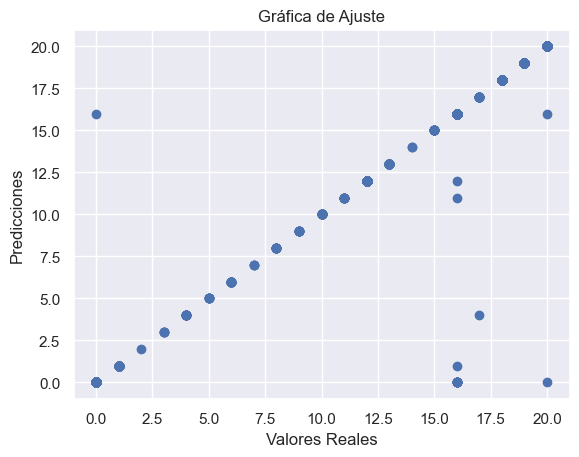

In [143]:
plt.scatter(y_train, dtc.predict(X_train))
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.title('Gráfica de Ajuste', fontsize=12)
plt.show()

In [144]:
train_size_abs, train_scores, test_scores = learning_curve(dtc, X_DTC, y, train_sizes=[0.1, 0.2, 0.3, 0.6, 0.9])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} muestras se usaron para entrenar el modelo")
    print(f"La precisión media del TRAIN es {cv_train_scores.mean():.2f}")
    print(f"La precisión media del TEST es {cv_test_scores.mean():.2f}")

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


5011 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.93
10022 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.94
15033 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.89
30066 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.91
45099 muestras se usaron para entrenar el modelo
La precisión media del TRAIN es 1.00
La precisión media del TEST es 0.91


Según lo que podemos visualizar en el gráfico anterior y con los datos obtenidos por $learning$_$curve$ podemos llegar a la conclusión que nuestro modelo $Decision$ $Tree$ $Classifier$ tiene sobre-ajuste ($overfitting$). El sobre-ajuste ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos. El modelo aprende tanto los patrones reales de los datos como el ruido o las peculiaridades específicas de los datos de entrenamiento. Esto puede resultar en un rendimiento deficiente en datos no vistos.

Podemos evaluar que a la hora de realizar un algoritmo de clasificación hay varias varaibles a tener en cuenta para mejor su performance. No solo se debe probar con varios factores para decicir cuál es el mejor sino que, además, se debería probar con la cantidad de variables que deseamos analizar con $Forward$ $Selection$. Seguramente si cambiamos la cantidad de variables a considerar podríamos mejorar o empeorar el desempeño de ambos algoritmos.

En $KNN$ he comparado con varios vecinos (K) y es un factor a tener en cuenta para futuros análisis.

Otro factor es el tamaño del test (he tomado para ambos casos: test_size=0.3). Este valor debería probarse variando dependiendo el conjunto de datos con el que contamos.

## Formas de prevenir el overfitting:

- Dividir nuestros datos en training, validación y testing.
- Obtener un mayor número de datos.
- Ajustar los parámetros de nuestros modelos.
- Utilizar modelos más simples.
- Los datos vienen de distintas distribuciones.
- Bajar el número de iteraciones en los algoritmos iterativos.

En nuestro caso puntual del Árbol de Decisión una solución sería simplificar el árbol a cantidad de niveles y obtener un mayor número de datos para los casos más puntuales.
    
## Formas de prevenir el underfitting:

- Tratar los datos correctamente, eliminando outliers y variables innecesarias.
- Utilizar modelos más complejos.
- Ajustar los parámetros de nuestros modelos.
- Aumentar las iteraciones en los algoritmos iterativos
    
En nuestro caso puntual de KNN una solución sería aumentar obtener un mayor número de datos para  los casos más puntuales y verificar si la cantidad de variables son correctas. Quizás para un número menor de variables el algoritmo se comporte mejor.

Para ambos casos, siempre es bueno hacer una buena depuración de los datos tratando de perder la menor información posible y de tener un buen volumen de datos para que nuestro algoritmo tenga un buen entrenamiento y pueda adaptarse a la realidad.